Chapter 27
# 三维空间平移、缩放、旋转、投影
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

## 初始化

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

## 创建数据

In [2]:
# 自定义函数，生成三维网格数据

num = 21

array_1_0 = np.linspace(0,1,num)
array_0_0 = np.ones_like(array_1_0)
array_1_1 = np.zeros_like(array_1_0)

A1 = np.column_stack([array_1_0,array_0_0,array_0_0])
A2 = np.column_stack([array_1_0,array_1_1,array_0_0])
A3 = np.column_stack([array_1_0,array_0_0,array_1_1])
A4 = np.column_stack([array_1_0,array_1_1,array_1_1])

A = np.vstack((A1,A2,A3,A4))
B = np.roll(A, 1)
C = np.roll(A, 2)

Data   = np.vstack((A,B,C))
Colors = np.vstack((A,B,C))



## 可视化方案

In [64]:
def visualize(Data, Colors, fig, idx, elev=35, azim=35, roll = 0):

    ax = fig.add_subplot(2,2,idx, projection = '3d')
    # 增加三维轴

    # 用三维散点图绘可视化立方体外侧三个鲜亮的侧面
    ax.scatter(Data[:,0], # x 坐标
               Data[:,1], # y 坐标
               Data[:,2], # z 坐标
               c = Colors,  # 颜色色号
               s = 2,              # 散点大小
               alpha = 1)          # 透明度，1 代表完全不透

    ax.quiver(0, 0, 0, 
              2, 0, 0,
              length = 1, 
              color = 'r',
              normalize=False, 
              arrow_length_ratio = .07, 
              linestyles = 'solid',
              linewidths = 0.25)

    ax.quiver(0, 0, 0, 
              0, 2, 0,
              length = 1, 
              color = 'g',
              normalize=False, 
              arrow_length_ratio = .07, 
              linestyles = 'solid',
              linewidths = 0.25)

    ax.quiver(0, 0, 0, 
              0, 0, 2,
              length = 1, 
              color = 'b',
              normalize=False, 
              arrow_length_ratio = .07, 
              linestyles = 'solid',
              linewidths = 0.25)

    A = [1, 1, 1]

    B = [1, 0, 1]
    C = [1, 1, 0]
    D = [0, 1, 1]

    E = [1, 0, 0]
    F = [0, 1, 0]
    G = [0, 0, 1]

    O = [0, 0, 0]

    # 绘制 AB、AC、AD
    ax.plot([A[0], B[0]],
            [A[1], B[1]],
            [A[2], B[2]], c = '0.5')

    ax.plot([A[0], C[0]],
            [A[1], C[1]],
            [A[2], C[2]], c = '0.5')

    ax.plot([A[0], D[0]],
            [A[1], D[1]],
            [A[2], D[2]], c = '0.5')

    # 绘制 OE、OF、OG

    ax.plot([O[0], E[0]],
            [O[1], E[1]],
            [O[2], E[2]], c = '0.5')

    ax.plot([O[0], F[0]],
            [O[1], F[1]],
            [O[2], F[2]], c = '0.5')

    ax.plot([O[0], G[0]],
            [O[1], G[1]],
            [O[2], G[2]], c = '0.5')

    # 绘制 OE、OF、OG

    ax.plot([O[0], E[0]],
            [O[1], E[1]],
            [O[2], E[2]], c = '0.5')

    ax.plot([O[0], F[0]],
            [O[1], F[1]],
            [O[2], F[2]], c = '0.5')

    ax.plot([O[0], G[0]],
            [O[1], G[1]],
            [O[2], G[2]], c = '0.5')

    # 绘制 BE、CE

    ax.plot([B[0], E[0]],
            [B[1], E[1]],
            [B[2], E[2]], c = '0.5')

    ax.plot([C[0], E[0]],
            [C[1], E[1]],
            [C[2], E[2]], c = '0.5')

    # 绘制 CF、DF
    ax.plot([C[0], F[0]],
            [C[1], F[1]],
            [C[2], F[2]], c = '0.5')

    ax.plot([D[0], F[0]],
            [D[1], F[1]],
            [D[2], F[2]], c = '0.5')

    # 绘制 GB、GD
    ax.plot([B[0], G[0]],
            [B[1], G[1]],
            [B[2], G[2]], c = '0.5')

    ax.plot([D[0], G[0]],
            [D[1], G[1]],
            [D[2], G[2]], c = '0.5')

    ax.plot((-2,2),(0,0),(0,0), c = '0.8', lw = 0.25)
    ax.plot((0,0),(-2,2),(0,0), c = '0.8', lw = 0.25)
    ax.plot((0,0),(0,0),(-2,2), c = '0.8', lw = 0.25)

    ax.view_init(elev=elev, azim=azim)
    # ax.view_init(elev=90, azim=-90) # x-y
    # ax.view_init(elev=0, azim=-90) # x-z
    # ax.view_init(elev=0, azim=0) # y-z
    # 设定观察视角

    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_zlim(-2,2)
    # 设定 x、y、z 取值范围

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    # 不显示刻度

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    # 不显示轴背景

    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')
    # 图脊设为白色

    # ax.set_xlabel('x')
    # ax.set_ylabel('y')
    # ax.set_zlabel('z')

    ax.grid(False)
    # 不显示网格

    ax.set_proj_type('ortho')
    # 正交投影

    ax.set_box_aspect(aspect = (1,1,1))
    # 等比例成像

    # Transparent spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Transparent panes
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    
    

In [65]:
# 四个不同投影
def visualize_4(Data, Colors, name):

    fig = plt.figure(figsize = (8,8))
    
    visualize(Data, Colors, fig, 1, elev=35, azim=35)
    
    visualize(Data, Colors, fig, 2, elev=90, azim=-90)
    # ax.view_init(elev=90, azim=-90) # x-y
    
    visualize(Data, Colors, fig, 3, elev=0, azim=-90)
    # ax.view_init(elev=0, azim=-90) # x-z
    
    visualize(Data, Colors, fig, 4, elev=0, azim=0)
    # ax.view_init(elev=0, azim=0) # y-z
    

    fig.savefig('Figures/' + name + '.svg', format='svg')
    

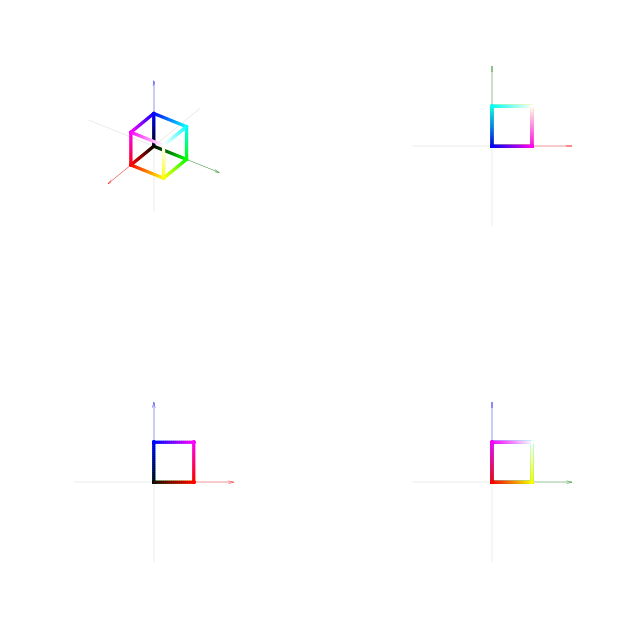

In [66]:
visualize_4(Data, Colors, '原始_4views')

## 平移

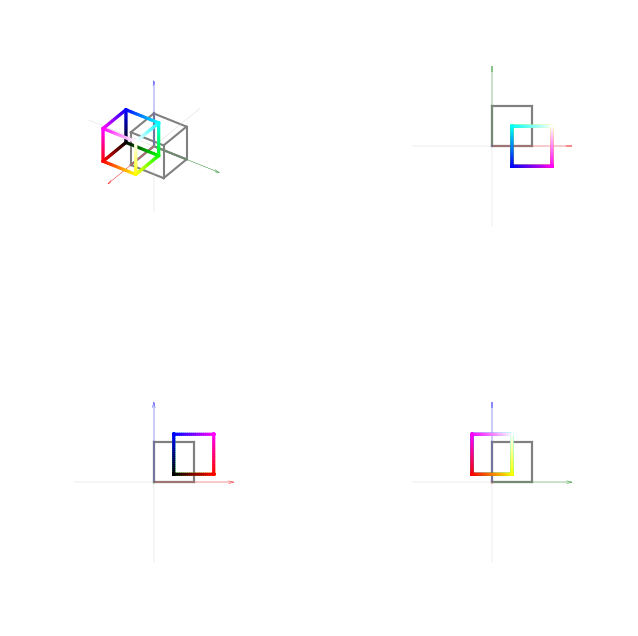

In [6]:
t = np.array([[0.5, -0.5, 0.2]])

Data_around_x = Data + t

visualize_4(Data_around_x, Colors, '平移_4views')

## 等比例缩放

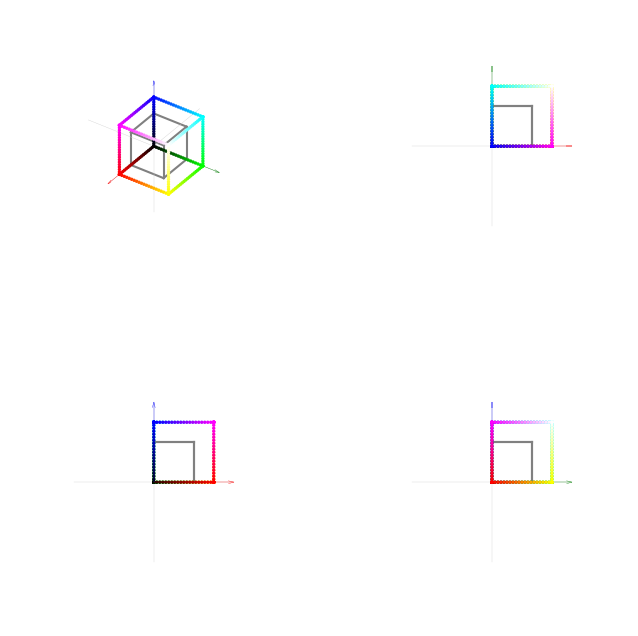

In [7]:
alpha = np.deg2rad(30)

S_eq = np.array([[1.5, 0,   0],
                 [0,   1.5, 0],
                 [0,   0,   1.5]])

Data_around_x = Data @ S_eq.T # S_eq = S_eq.T

visualize_4(Data_around_x, Colors, '等比例缩放_4views')

## 非等比例缩放

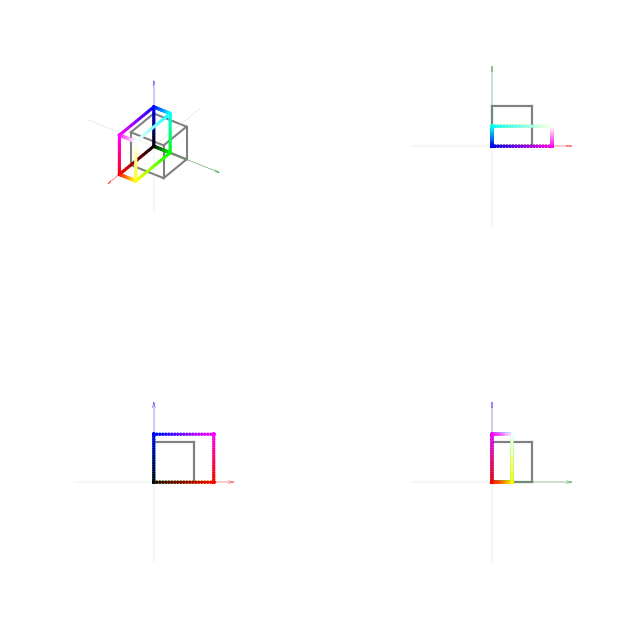

In [8]:
alpha = np.deg2rad(30)

S_eq = np.array([[1.5, 0,   0],
                 [0,   0.5, 0],
                 [0,   0,   1.2]])

Data_around_x = Data @ S_eq.T # S_eq = S_eq.T

visualize_4(Data_around_x, Colors, '非等比例缩放_4views')

## 绕x轴逆时针旋转

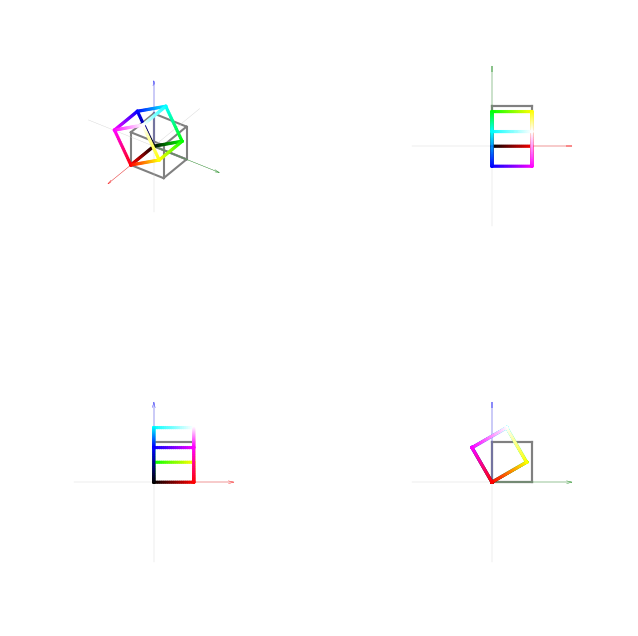

In [9]:
alpha = np.deg2rad(30)

R_x = np.array([[1, 0,              0],
                [0, np.cos(alpha), -np.sin(alpha)],
                [0, np.sin(alpha),  np.cos(alpha)]])

Data_around_x = Data @ R_x.T

visualize_4(Data_around_x, Colors, '绕x轴逆时针旋转_4views')

## 绕y轴逆时针旋转

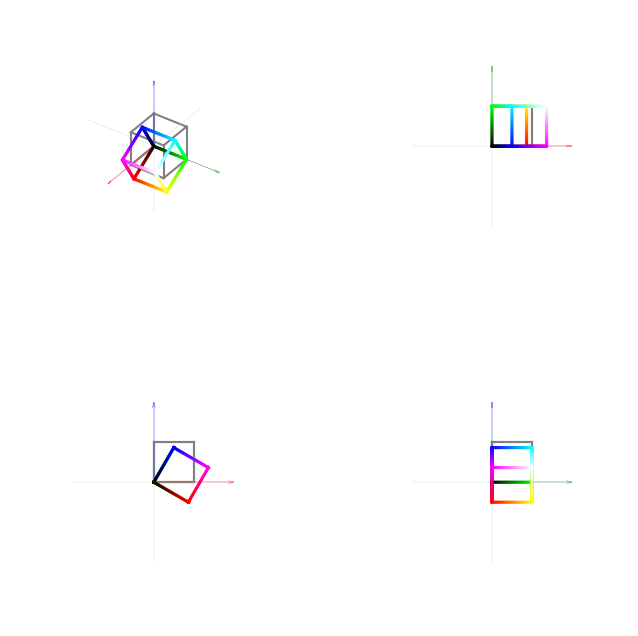

In [67]:
beta = np.deg2rad(30)

# 从 y 正方向看
R_y = np.array([[np.cos(beta), 0, np.sin(beta)],
                [0,            1, 0],
                [-np.sin(beta),0, np.cos(beta)]])

Data_around_y = Data @ R_y.T
visualize_4(Data_around_y, Colors, '绕y轴逆时针旋转_4views')

## 绕z轴逆时针旋转

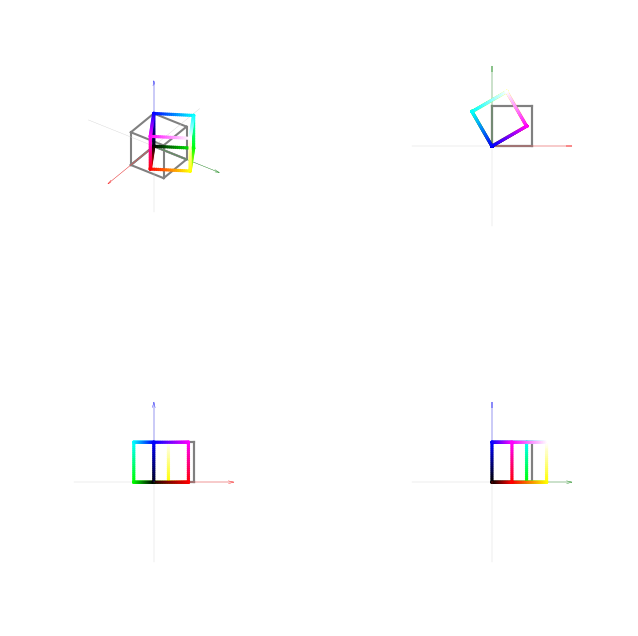

In [11]:
gamma = np.deg2rad(30)

R_z = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                [np.sin(gamma),  np.cos(gamma), 0],
                [0,              0,             1]])

Data_around_z = Data @ R_z.T
visualize_4(Data_around_z, Colors, '绕z轴逆时针旋转_4views')

## 先后绕 x、y旋转

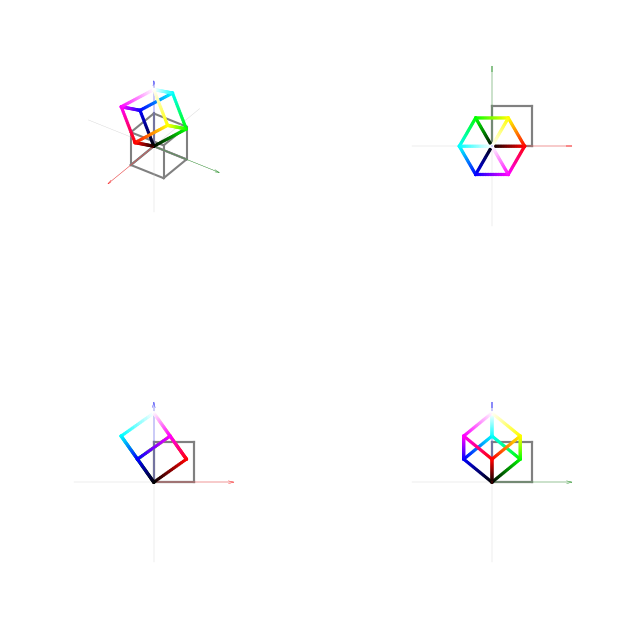

In [13]:
alpha = np.deg2rad(45)

R_x = np.array([[1, 0,              0],
                [0, np.cos(alpha), -np.sin(alpha)],
                [0, np.sin(alpha),  np.cos(alpha)]])

beta = np.arctan(-1/np.sqrt(2))

# 从 y 正方向看
R_y = np.array([[np.cos(beta), 0, np.sin(beta)],
                [0,            1, 0],
                [-np.sin(beta),0, np.cos(beta)]])

Data_around_xy = Data @ R_x.T @ R_y.T
visualize_4(Data_around_xy, Colors, '绕x、y轴逆时针旋转_4views')

## 先后绕 x、y、z旋转

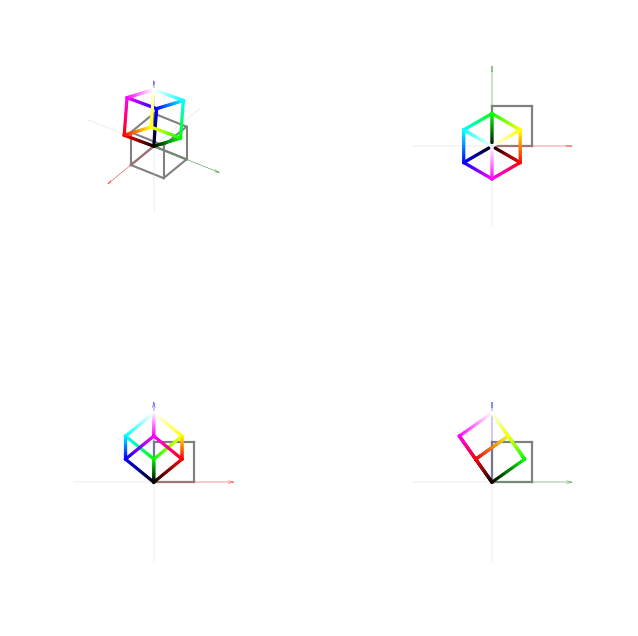

In [73]:
alpha = np.deg2rad(45)

R_x = np.array([[1, 0,              0],
                [0, np.cos(alpha), -np.sin(alpha)],
                [0, np.sin(alpha),  np.cos(alpha)]])

beta = np.arctan(-1/np.sqrt(2))

# 从 y 正方向看
R_y = np.array([[np.cos(beta), 0, np.sin(beta)],
                [0,            1, 0],
                [-np.sin(beta),0, np.cos(beta)]])

gamma = np.deg2rad(-30)

R_z = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                [np.sin(gamma),  np.cos(gamma), 0],
                [0,              0,             1]])

Data_around_xyz = Data @ R_x.T @ R_y.T @ R_z.T
visualize_4(Data_around_xyz, Colors, '绕x、y、z轴逆时针旋转_4views')


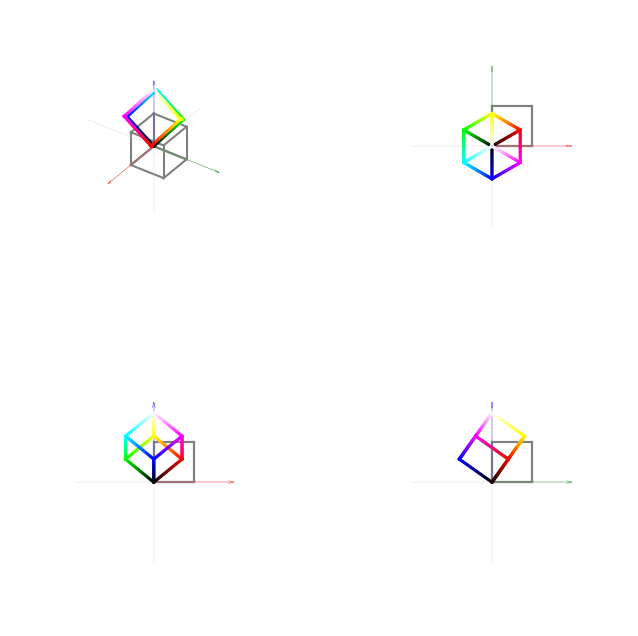

In [74]:
alpha = np.deg2rad(45)

R_x = np.array([[1, 0,              0],
                [0, np.cos(alpha), -np.sin(alpha)],
                [0, np.sin(alpha),  np.cos(alpha)]])

beta = np.arctan(-1/np.sqrt(2))

# 从 y 正方向看
R_y = np.array([[np.cos(beta), 0, np.sin(beta)],
                [0,            1, 0],
                [-np.sin(beta),0, np.cos(beta)]])

gamma = np.deg2rad(30)

R_z = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                [np.sin(gamma),  np.cos(gamma), 0],
                [0,              0,             1]])

Data_around_xyz2 = Data @ R_x.T @ R_y.T @ R_z.T
visualize_4(Data_around_xyz2, Colors, '绕x、y、z轴逆时针旋转_4views_2')


## 向xy平面投影 

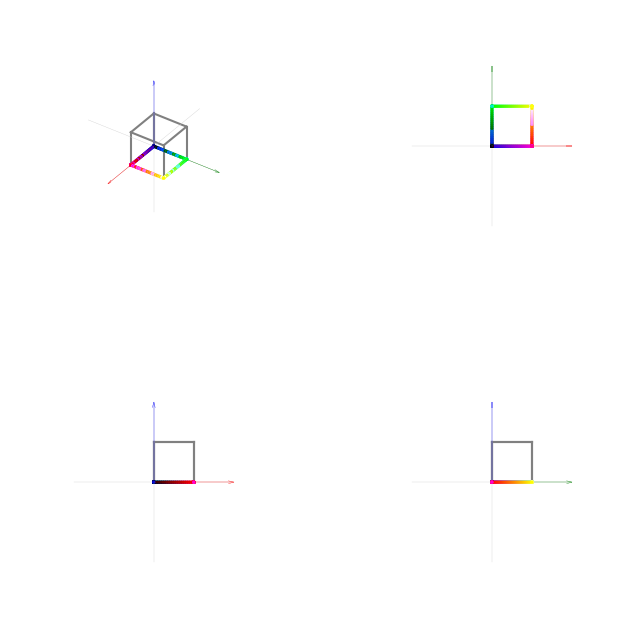

In [68]:
v1 = np.array([[np.sqrt(3)/3, np.sqrt(3)/3, np.sqrt(3)/3]])
v2 = np.array([[np.sqrt(2)/2,-np.sqrt(2)/2, 0]])

Data_proj_xy = Data @ P_xy.T
visualize_4(Data_proj_xy, Colors, '向xy平面投影_4views')

## 向xz平面投影 

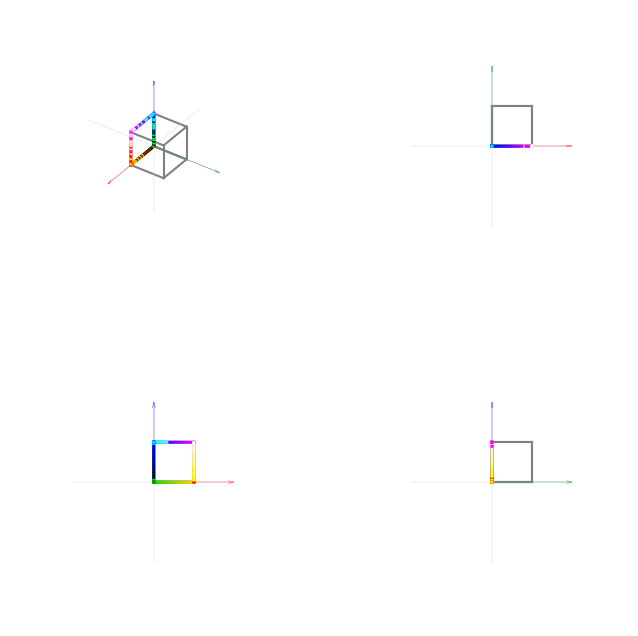

In [71]:
P_xz = np.array([[1, 0, 0],
                [0, 0, 0],
                [0, 0, 1]])

Data_proj_xz = Data @ P_xz.T
visualize_4(Data_proj_xz, Colors, '向xz平面投影_4views')

## 向yz平面投影 

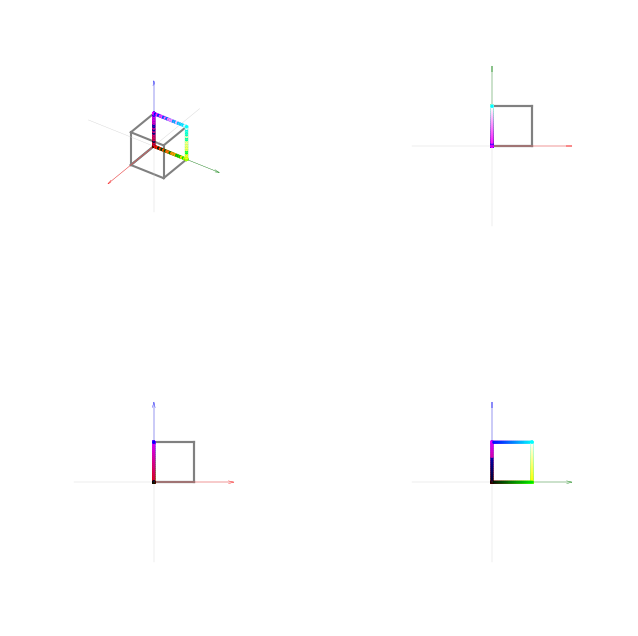

In [72]:
P_yz = np.array([[0, 0, 0],
                [0, 1, 0],
                [0, 0, 1]])

Data_proj_yz = Data @ P_yz.T
visualize_4(Data_proj_yz, Colors, '向yz平面投影_4views')

## 向特定平面投影 

[[0.]]


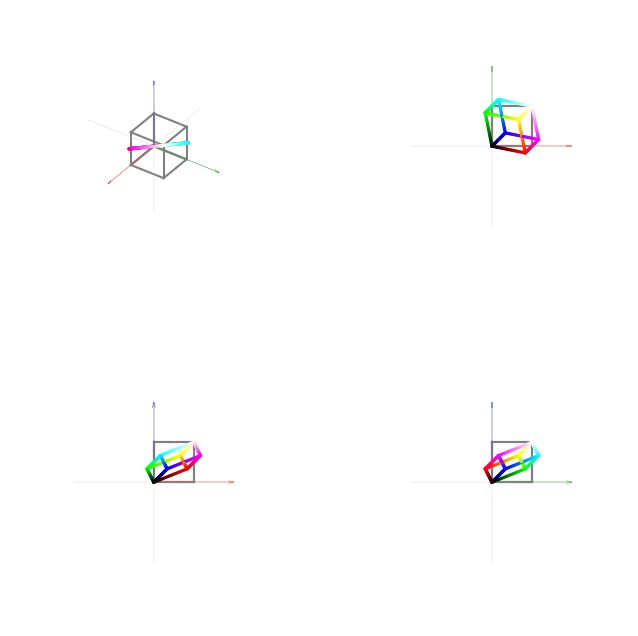

In [18]:
v1 = np.array([[np.sqrt(3)/3, np.sqrt(3)/3, np.sqrt(3)/3]])
v2 = np.array([[np.sqrt(2)/2,-np.sqrt(2)/2, 0]])

print(v1 @ v2.T)

P_v1v2 = v1.T @ v1 + v2.T @ v2

Data_proj_v1v2 = Data @ P_v1v2.T
visualize_4(Data_proj_v1v2, Colors, '向特定平面投影_4views')